# python 基础

## 字典

In [1]:
map_abc = {
    "a" : 0,
    "b" : [1,2,3],
    "c" : {"cc" : 4}
}

In [2]:
print(map_abc["a"])
print(map_abc["b"], map_abc["b"][1])
print(map_abc["c"]["cc"])
for k in map_abc:
    print("key:",k, "\nvalue:", map_abc[k])

0
[1, 2, 3] 2
4
key: b 
value: [1, 2, 3]
key: a 
value: 0
key: c 
value: {'cc': 4}


## numpy 处理缺失数据

In [3]:
import numpy as np


np_temp = [36.2, 36.3, 36.4, np.nan, 36.3, 36.2, 36.4]
print(np.mean(np_temp))
print(np.nanmean(np_temp))
np_temp[3] = np.nanmean(np_temp)
print(np.mean(np_temp))



nan
36.3
36.3


## pandas one hot 编码

In [4]:
import pandas as pd

df_onehot_example = pd.DataFrame({"name" : [u"张三", u"李四", u"王五", u"李武"], 
                                  "job" : [u"工人", u"农民", u"军人", u"工人"]})

pd.get_dummies(df_onehot_example, columns=["job"])

,name,job_军人,job_农民,job_工人
0,张三,0,0,1
1,李四,0,1,0
2,王五,1,0,0
3,李武,0,0,1


## matplotlib 作图与过拟合欠拟合

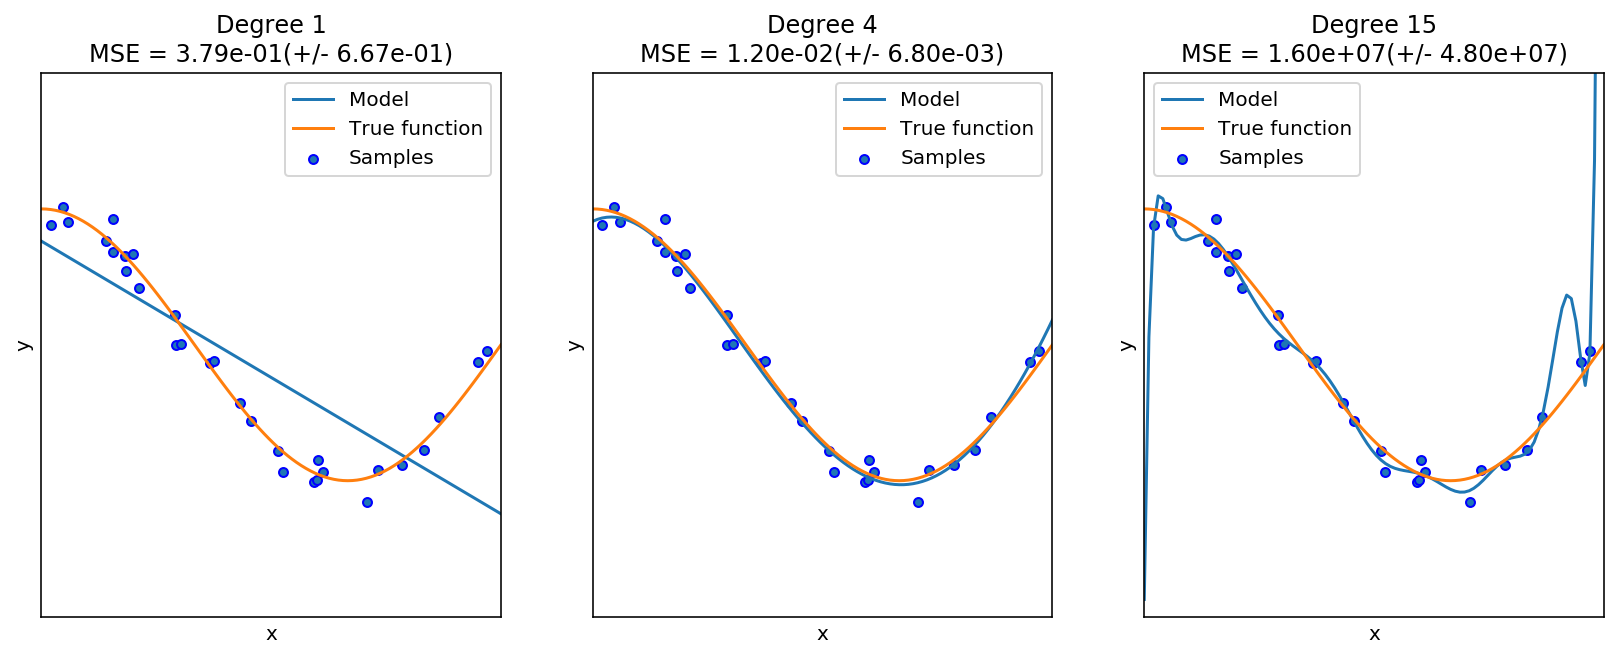

In [5]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(42)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# 鸢尾花数据集

## 预览数据

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

%matplotlib inline
sns.set_style("white")

data = datasets.load_iris()
for k in data:
    print("############\n##%s##\n############\n" % k)
    print(data[k])

############
##feature_names##
############

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
############
##DESCR##
############

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)


In [7]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['species'] = [ data['target_names'][x] for x in data.target ]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df_cnt = df['species'].value_counts().reset_index()
df_cnt

,index,species
0,setosa,50
1,versicolor,50
2,virginica,50


/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


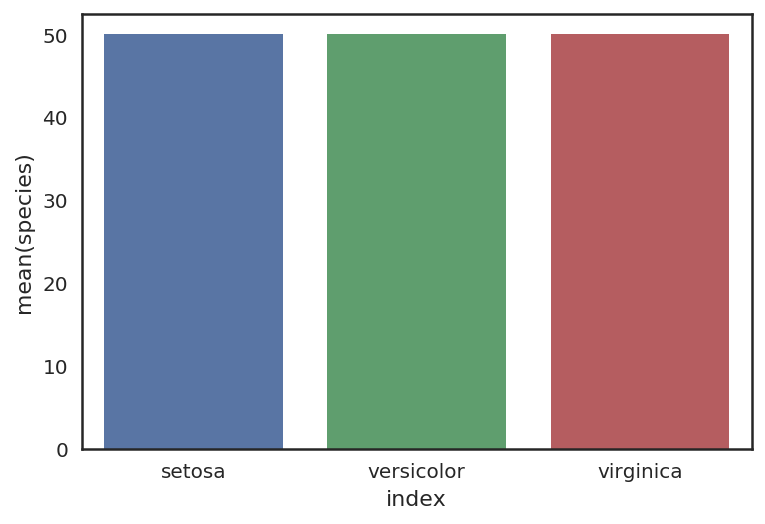

In [9]:
sns.barplot(data=df_cnt, x='index', y='species')

### 均值方差

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
pd.melt(df, id_vars=['species'])

,species,variable,value
0,setosa,sepal length (cm),5.1
1,setosa,sepal length (cm),4.9
2,setosa,sepal length (cm),4.7
3,setosa,sepal length (cm),4.6
4,setosa,sepal length (cm),5.0
5,setosa,sepal length (cm),5.4
6,setosa,sepal length (cm),4.6
7,setosa,sepal length (cm),5.0
8,setosa,sepal length (cm),4.4
9,setosa,sepal length (cm),4.9


### 正态分布检验

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


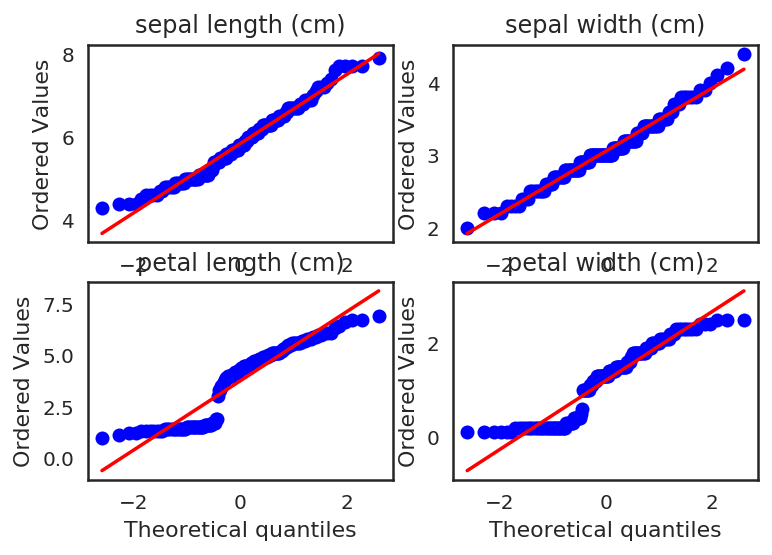

In [12]:
from scipy import stats

for i in range(4):
    name = data.feature_names[i]
    ax = plt.subplot(2,2,i+1)
    stats.probplot(df[name], plot=ax)
    ax.set_title(name)


### 分组观察

In [13]:
pd.melt(df, id_vars=['species']).pivot_table(index=['species'], columns=['variable'], aggfunc=[np.mean, np.var])

mean                                     \
                       value                                      
variable   petal length (cm) petal width (cm) sepal length (cm)   
species                                                           
setosa                 1.464            0.244             5.006   
versicolor             4.260            1.326             5.936   
virginica              5.552            2.026             6.588   

                                          var                   \
                                        value                    
variable   sepal width (cm) petal length (cm) petal width (cm)   
species                                                          
setosa                3.418          0.030106         0.011494   
versicolor            2.770          0.220816         0.039106   
virginica             2.974          0.304588         0.075433   

                                               
                                               
variable   sepal length (cm) sepal width (cm)  
species                                        
setosa              0.124249         0.145180  
versicolor          0.266433         0.098469  
virginica           0.404343         0.104004

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


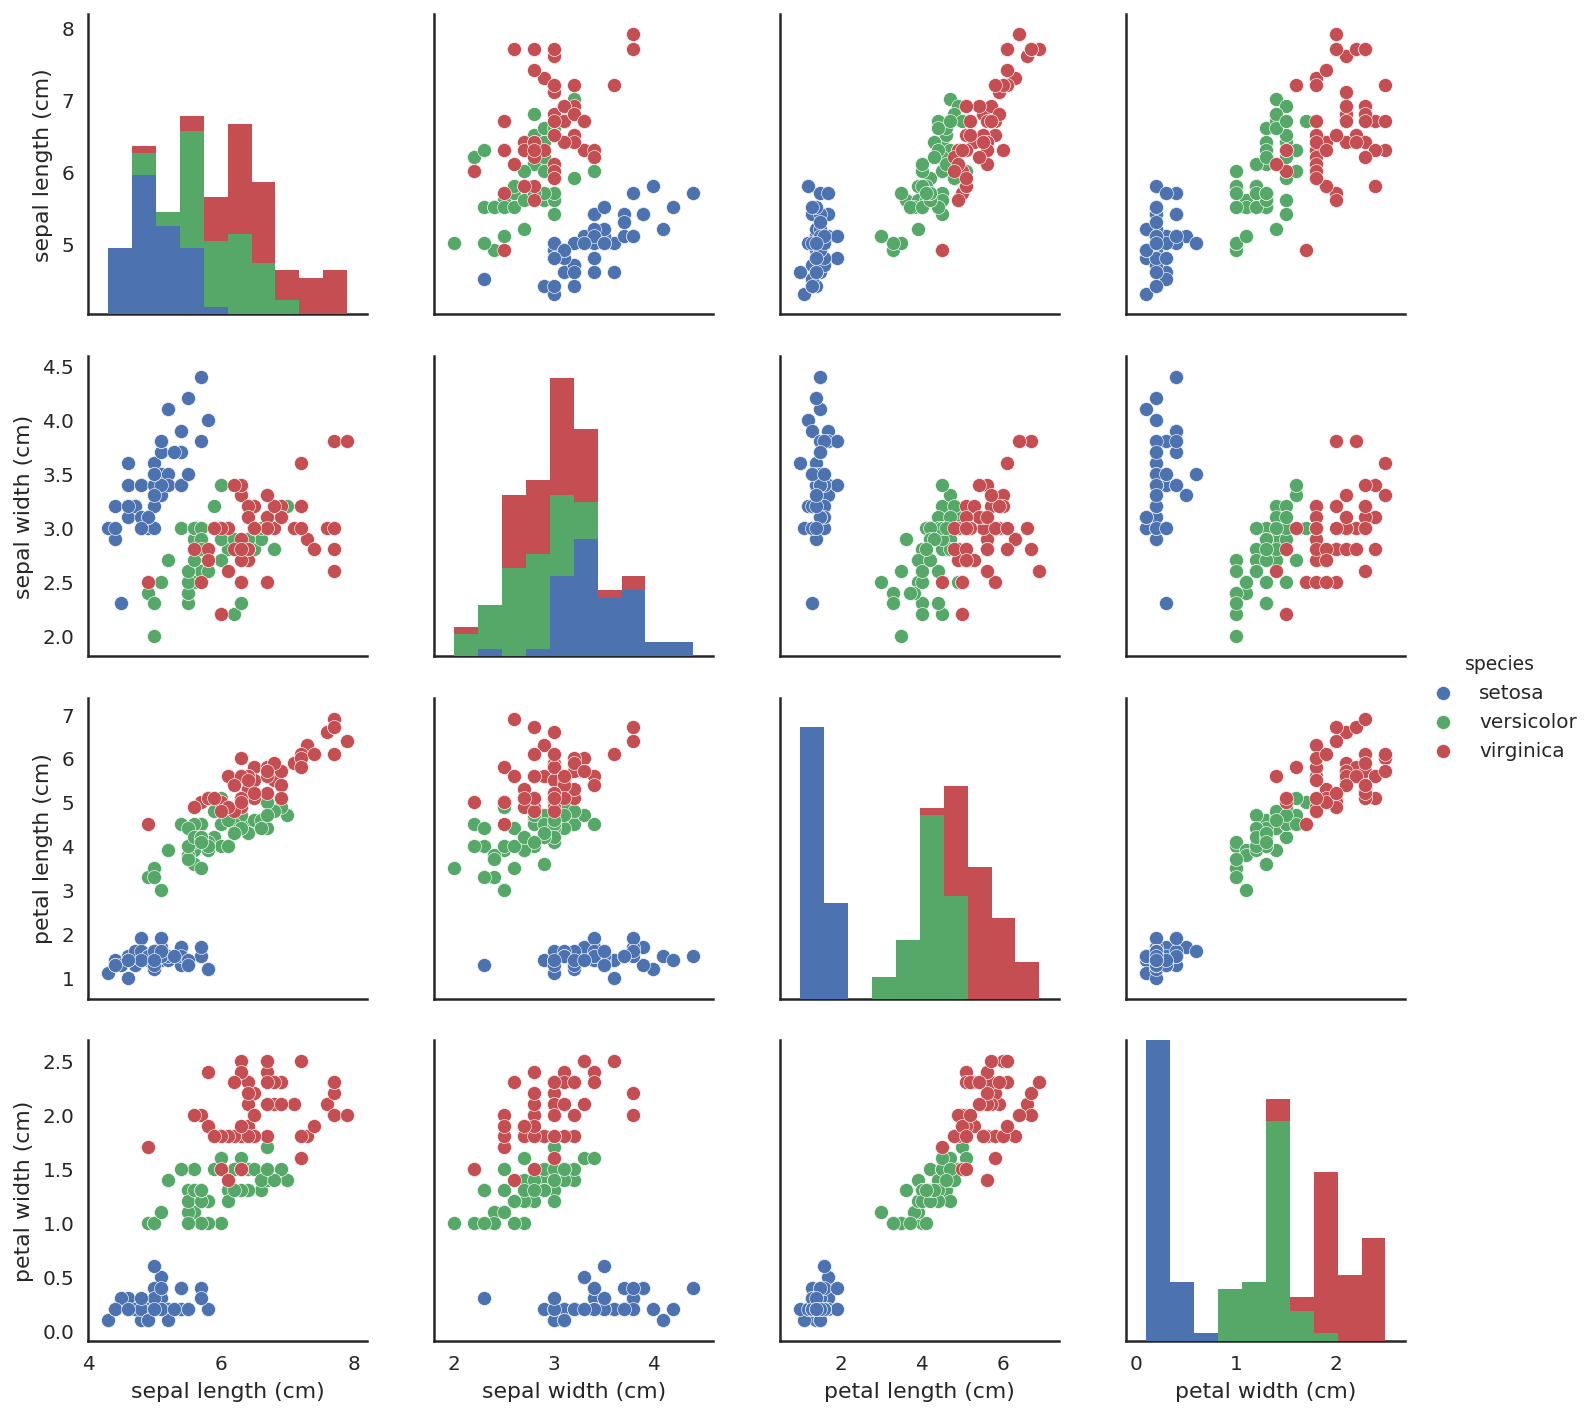

In [14]:
sns.pairplot(df, hue="species")

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


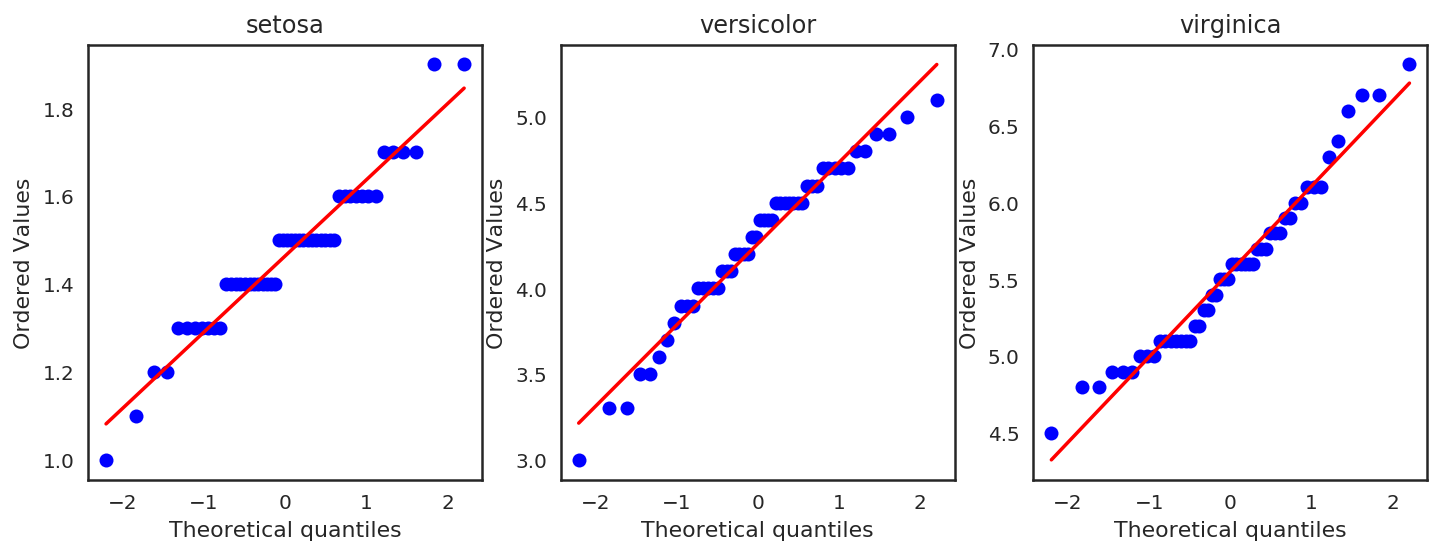

In [15]:
fig = plt.figure(figsize=(12,4))

for i in range(3):
    name = data.target_names[i]
    ax = plt.subplot(1,3,i+1)
    stats.probplot(df[df['species']==name][data.feature_names[2]], plot=ax)
    ax.set_title(name)


### 基于 PCA 数据降维

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


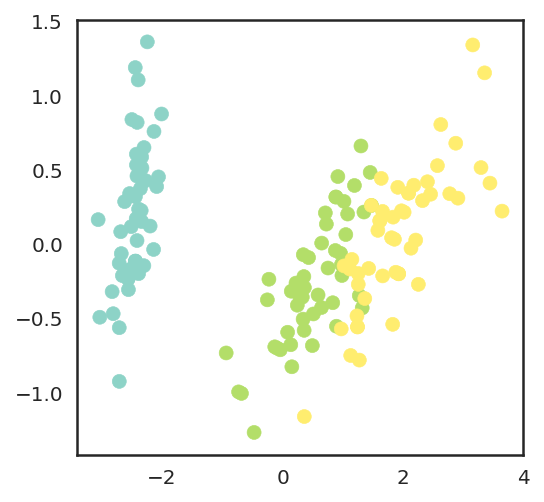

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
df_sub = df[data.feature_names[0:3]]
pca.fit(df_sub)
pca_result = pca.transform(df_sub)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(pca_result[:, 0], pca_result[:, 1], c=data.target, cmap=plt.cm.Set3)

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


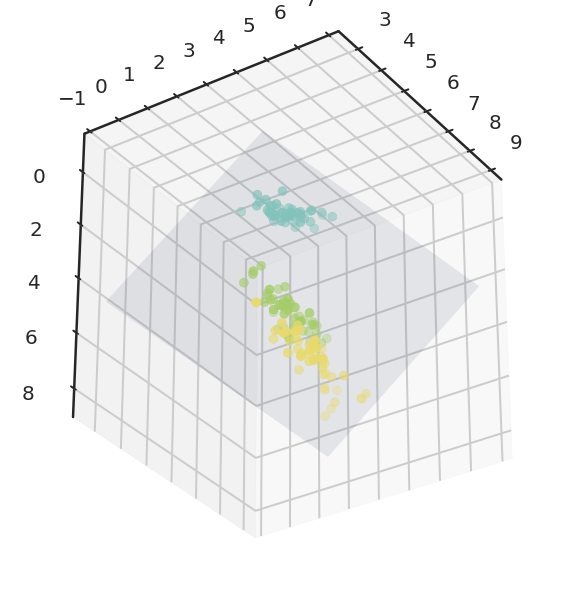

In [17]:
from mpl_toolkits.mplot3d import Axes3D

plane_show_size_ratio = 5
plane_show_shift = df_sub.mean().values
pca_score = pca.explained_variance_ratio_
V = pca.components_
l_pca_axis = V.T * plane_show_size_ratio
l_pca_plane = []
for pca_axis in l_pca_axis:
    l_pca_plane.append(np.r_[pca_axis[:2], - pca_axis[1::-1]].reshape(2,2))

fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=150, azim=-34 )
ax.scatter(df_sub.values[:,0], df_sub.values[:,1],df_sub.values[:,2], '.', c=data.target, cmap=plt.cm.Set3)
ax.plot_surface(l_pca_plane[0]+plane_show_shift[0],
                l_pca_plane[1]+plane_show_shift[1],
                l_pca_plane[2]+plane_show_shift[2], alpha=0.1)

### 基于流形假设降维

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


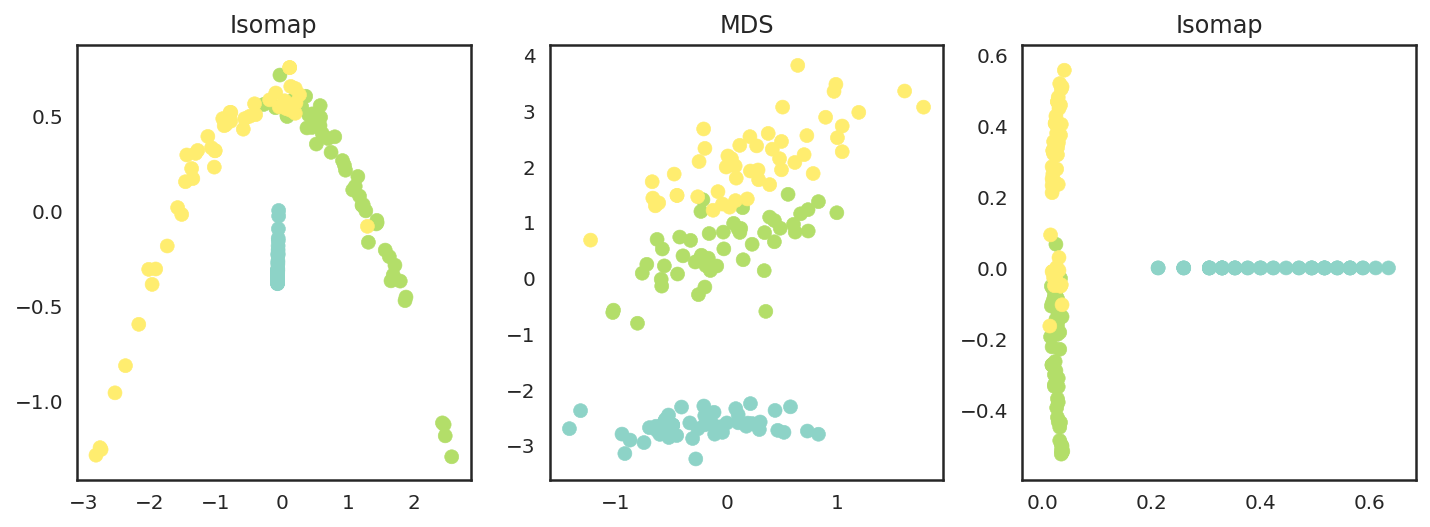

In [18]:
from sklearn.manifold import Isomap, MDS, SpectralEmbedding

n_components = 2
n_neighbors = 10
X = df.drop(['species'], axis=1)
color = data.target

fig = plt.figure(figsize=(12, 4))


Y = Isomap(n_neighbors, n_components).fit_transform(X)
ax = fig.add_subplot(131)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Set3)
ax.set_title("Isomap")

Y = MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
ax = fig.add_subplot(132)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Set3)
ax.set_title("MDS")

Y = SpectralEmbedding(n_components=n_components,n_neighbors=n_neighbors).fit_transform(X)
ax = fig.add_subplot(133)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Set3)
ax.set_title("Isomap")

## 数据预处理

### 划分训练集验证集并进行标准化

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# df 作为初步训练集，划分 80% 作为训练集， 20% 作为验证集
df_train, df_val = train_test_split(df, train_size=0.8, random_state=0)

# 提前特征，这里是将分类结果舍弃
X_train = df_train.drop(['species'], axis=1)
X_val   = df_val.drop(['species'], axis=1)
# 提取分类结果
Y_train = df_train['species']
Y_val   = df_val['species']

# 设定分布 X_scaler，用训练集估计(fit)分布，然后对验证集进行转换(transform)
X_scaler = StandardScaler()
X_trainT = X_scaler.fit_transform(X_train)
X_valT   = X_scaler.transform(X_val)

In [20]:
# 这里将保证训练集是标准正态分布，验证集不一定满足这个条件，但不会差很多
print(X_trainT.mean(axis=0), X_trainT.var(axis=0))
print(X_valT.mean(axis=0), X_valT.var(axis=0))

[  0.00000000e+00  -7.49863135e-16   4.25585493e-16   1.22124533e-16] [ 1.  1.  1.  1.]
[-0.22139933  0.00775008 -0.16081079 -0.20798778] [ 0.70916187  1.04757042  0.87342285  0.8028885 ]


# 特征挖掘

## 观察特征后，基于数据性质手动组合重要特征

In [21]:
from sklearn.utils import shuffle
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rb')

np.random.seed(42)
pseudoNum1 = 300
pseudoNum2 = 300
np_pho1   = 4.5 + np.random.rand(pseudoNum1)*2
np_pho2   = 0.5 + np.random.rand(pseudoNum2)*2
np_theta1 = np.random.rand(pseudoNum1)*360 / 2*np.pi
np_theta2 = np.random.rand(pseudoNum2)*360 / 2*np.pi

np_x1 = np_pho1 * np.cos(np_theta1)
np_y1 = np_pho1 * np.sin(np_theta1)
np_x2 = np_pho2 * np.cos(np_theta2)
np_y2 = np_pho2 * np.sin(np_theta2)

pd_circ = shuffle(pd.DataFrame({
    "X" : list(np_x1)+list(np_x2), 
    "Y" : list(np_y1)+list(np_y2), 
    "label" : ["Class1" for x in range(pseudoNum1)] + ["Class2" for x in range(pseudoNum2)]
}), random_state=0).reset_index().drop(['index'],axis=1)
pd_circ0 = pd_circ.copy()
pd_circ.head()

,X,Y,label
0,0.596878,-0.300411,Class2
1,5.112182,-0.494133,Class1
2,-3.340969,3.760705,Class1
3,-1.545823,0.033936,Class2
4,-0.846139,4.438461,Class1


/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


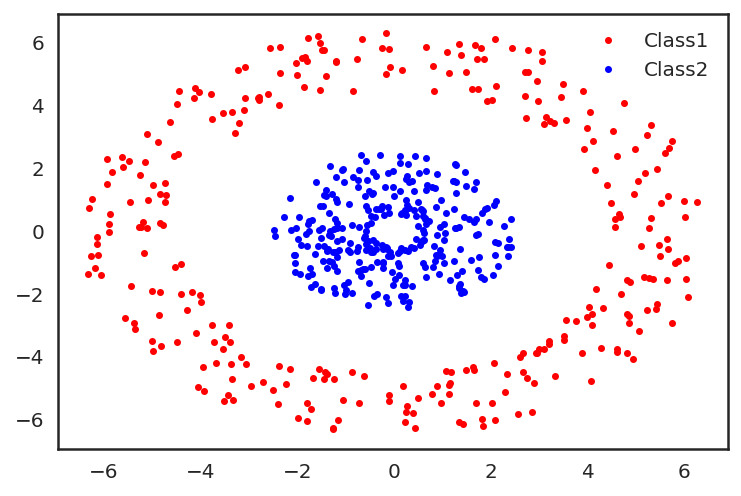

In [22]:
for sub in ["Class1", "Class2"]:
    pd_sub = pd_circ[pd_circ['label']==sub]
    plt.plot(pd_sub["X"], pd_sub["Y"], ".", label=sub)

plt.legend()

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


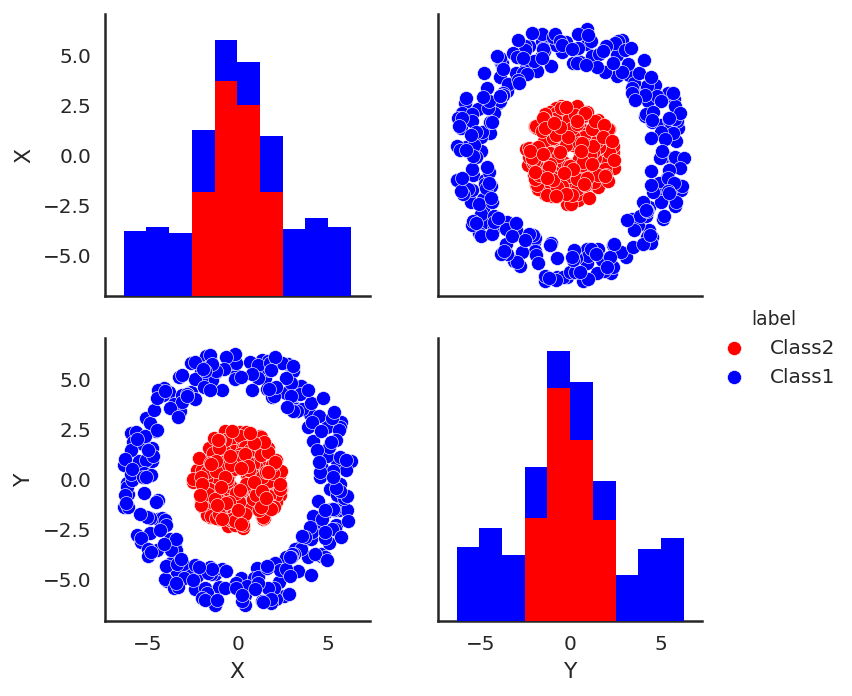

In [23]:
sns.pairplot(pd_circ, hue="label")

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


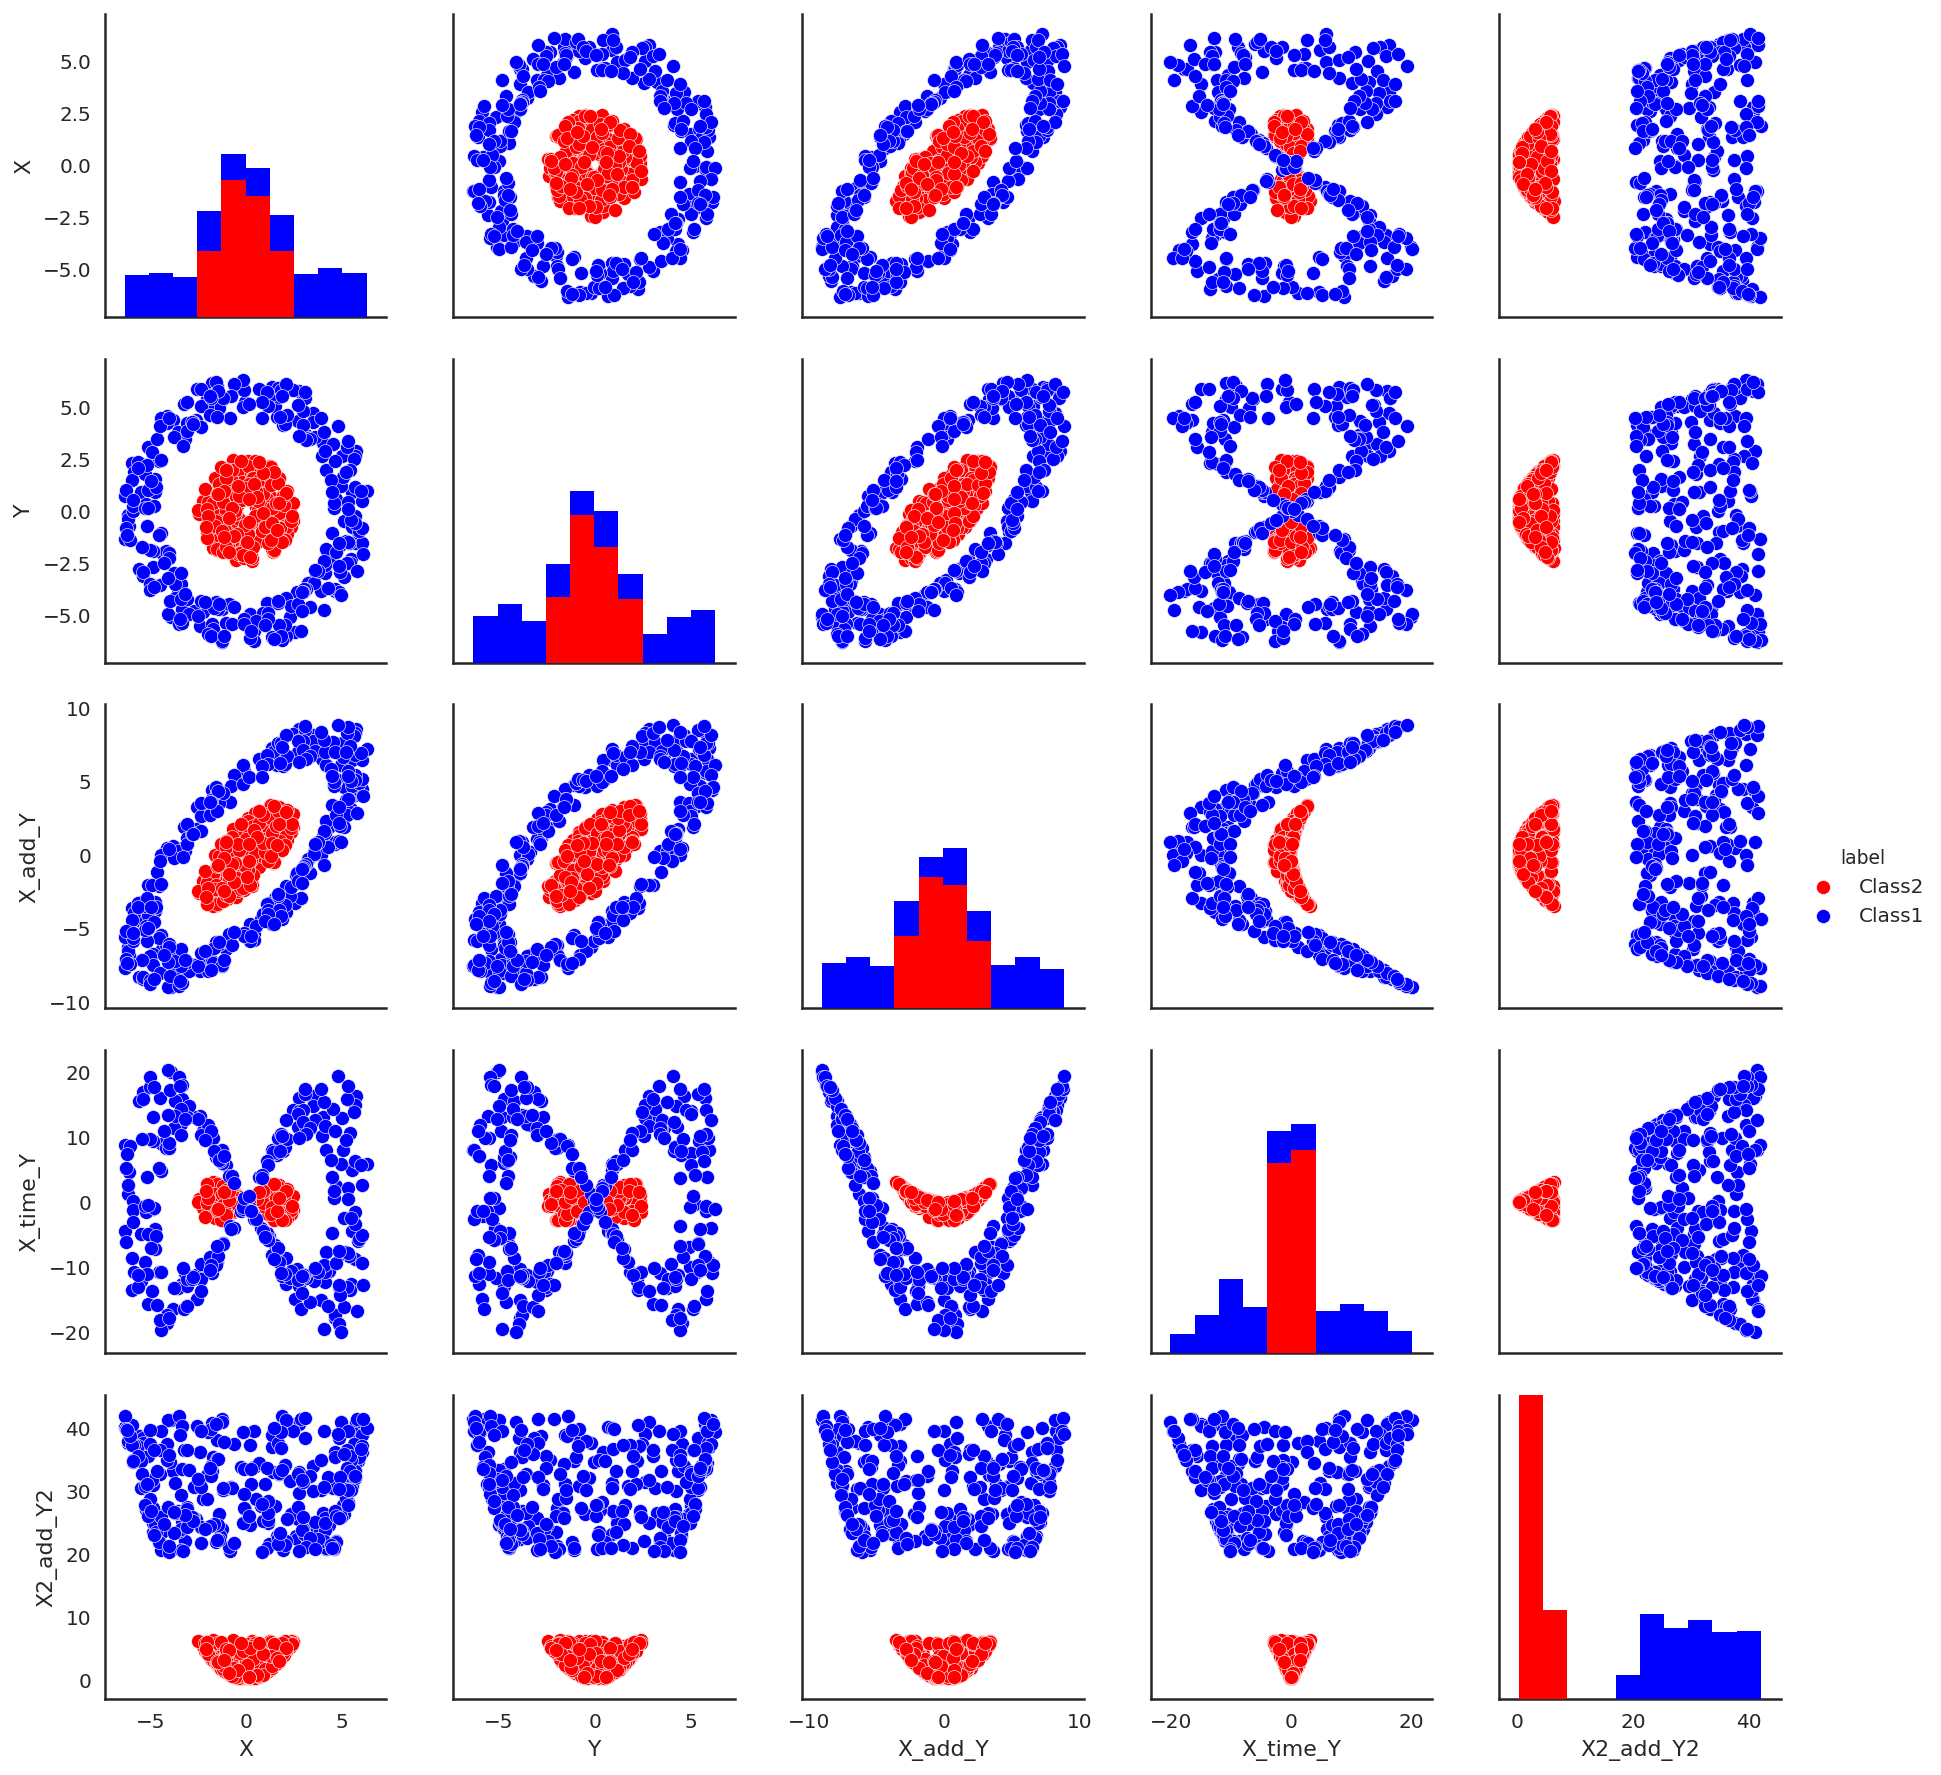

In [24]:
pd_circ['X_add_Y'] = pd_circ['X'] + pd_circ['Y']
pd_circ['X_time_Y'] = pd_circ['X'] * pd_circ['Y']
pd_circ['X2_add_Y2'] = pd_circ['X'] * pd_circ['X'] + pd_circ['Y'] * pd_circ['Y']
sns.pairplot(pd_circ, hue="label")

## 基于正态分布的模型，可以用正态分布的特性理解非线性数据

In [25]:
pd_circ_melt = pd_circ0.melt(id_vars=['label']).pivot_table(index=['variable'], columns=['label'], aggfunc=[np.mean, np.var])
pd_circ_melt

mean                  var          
             value                value          
label       Class1    Class2     Class1    Class2
variable                                         
X         0.053243 -0.061068  14.700192  1.331667
Y        -0.226383 -0.095715  15.837499  1.344845

![](https://docs.scipy.org/doc/numpy/_images/math/3f40671c78b1cb1d6a6f4a306a2b39a6d55921cf.png)

In [26]:
mean_X = pd_circ_melt['mean']['value'].loc['X'].values.reshape(2,1)
mean_Y = pd_circ_melt['mean']['value'].loc['Y'].values.reshape(2,1)
var_X  = pd_circ_melt['var']['value'].loc['X'].values.reshape(2,1)
var_Y  = pd_circ_melt['var']['value'].loc['Y'].values.reshape(2,1)

In [27]:
probX = 1 / np.sqrt(2*np.pi*var_X) * np.exp(-1*(np.array([pd_circ['X'].values,pd_circ['X'].values]).reshape(2,600)-mean_X)**2 / (2*var_X))
probY = 1 / np.sqrt(2*np.pi*var_Y) * np.exp(-1*(np.array([pd_circ['Y'].values,pd_circ['Y'].values]).reshape(2,600)-mean_Y)**2 / (2*var_Y))

In [28]:
pd2 = pd.DataFrame(probX.T*probY.T)
pd_circ['pred'] = pd2.apply(lambda x: "Class2" if x[0] < x[1] else "Class1", axis=1)
pd_circ

,X,Y,label,X_add_Y,X_time_Y,X2_add_Y2,pred
0,0.596878,-0.300411,Class2,0.296467,-0.179308,0.446509,Class2
1,5.112182,-0.494133,Class1,4.618049,-2.526096,26.378567,Class1
2,-3.340969,3.760705,Class1,0.419736,-12.564397,25.304972,Class1
3,-1.545823,0.033936,Class2,-1.511887,-0.052459,2.390721,Class2
4,-0.846139,4.438461,Class1,3.592322,-3.755553,20.415885,Class1
5,0.598898,-1.035838,Class2,-0.436940,-0.620361,1.431638,Class2
6,-0.528329,-1.654110,Class2,-2.182438,0.873914,3.015210,Class2
7,0.631817,-1.169935,Class2,-0.538118,-0.739185,1.767940,Class2
8,-0.471914,0.465258,Class2,-0.006656,-0.219562,0.439168,Class2
9,-3.787186,4.349275,Class1,0.562089,-16.471515,33.258974,Class1


In [29]:
pd_circ[pd_circ['label']!=pd_circ['pred']]

,X,Y,label,X_add_Y,X_time_Y,X2_add_Y2,pred


# 模型训练

## 交叉熵

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


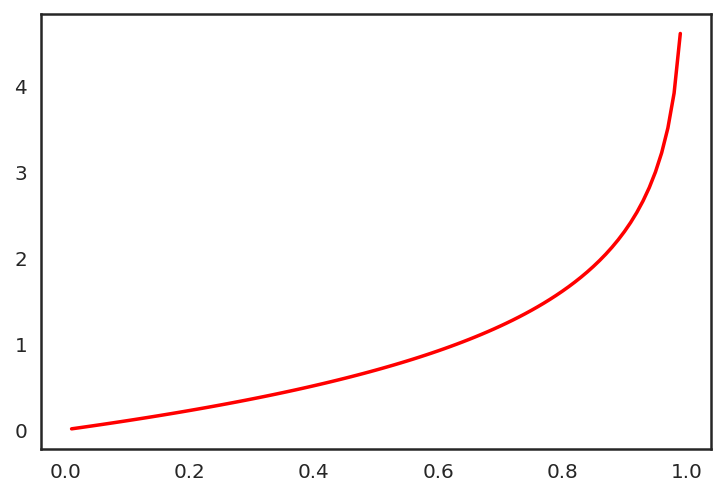

In [30]:
np_yhat = np.linspace(0, 1, 101)
np_h = -(0*np.log(np_yhat) + 1*np.log(1-np_yhat))
plt.plot(np_yhat, np_h)

## 动手写简单的逻辑斯蒂回归

In [31]:
y = data.target
y[y==2] = 1
X = np.hstack([data.data, np.ones_like(y).reshape(len(y),1)])
C = 1
alpha = 0.1

In [32]:
np.random.seed(42)
omega = np.random.random(X.shape[1]).reshape(5, 1)
for i in range(10):
    y_hat = 1 / (1+np.exp(-X.dot(omega)))
    dL = X.T.dot(C * (y.reshape(-1,1) - y_hat))
    omega += alpha * dL 
    
omega

array([[ -9.29344044],
       [-36.8596202 ],
       [ 65.35820903],
       [ 30.02270945],
       [ -7.25248065]])

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


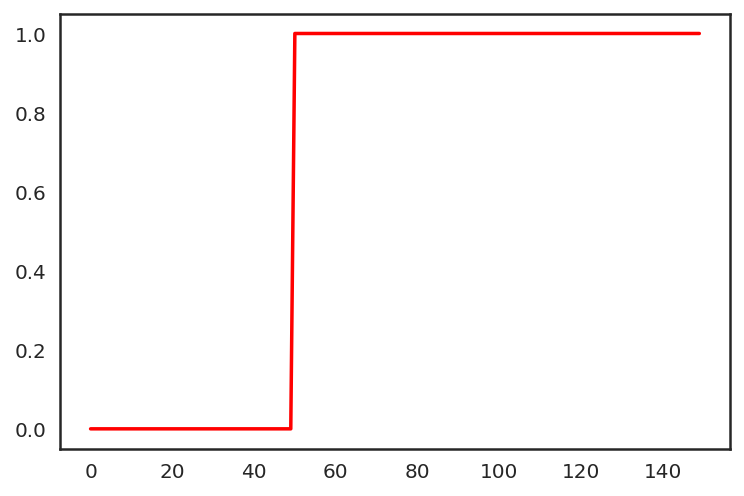

In [33]:
plt.plot( 1 / (1+np.exp(-X.dot(omega))))

### 考虑 L2 正则化

In [34]:
np.random.seed(42)
omega = np.random.random(X.shape[1]).reshape(5, 1)
for i in range(10):
    y_hat = 1 / (1+np.exp(-X.dot(omega)))
    dL = X.T.dot(C * (y.reshape(-1,1) - y_hat)) + omega
    omega += alpha * dL
    
omega

array([[-16.8213461 ],
       [-39.77445862],
       [ 62.60998404],
       [ 30.07176958],
       [ -8.52757522]])

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


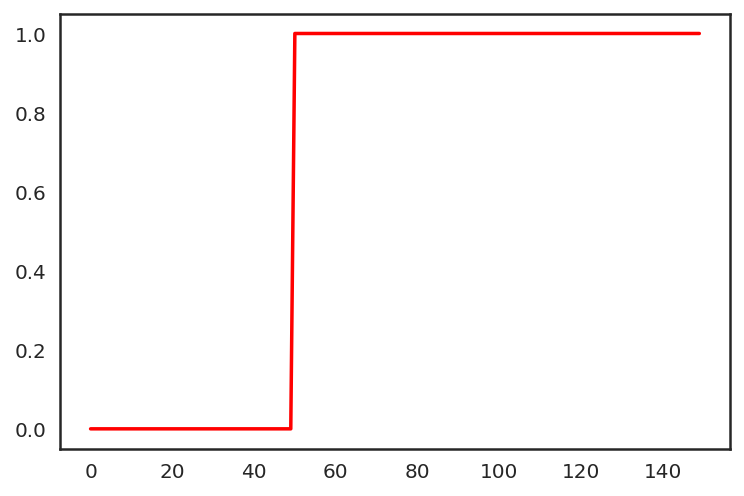

In [35]:
plt.plot(1 / (1+np.exp(-X.dot(omega))))

## 使用 sklearn 库进行逻辑斯蒂回归

In [36]:
from sklearn.linear_model import LogisticRegression

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


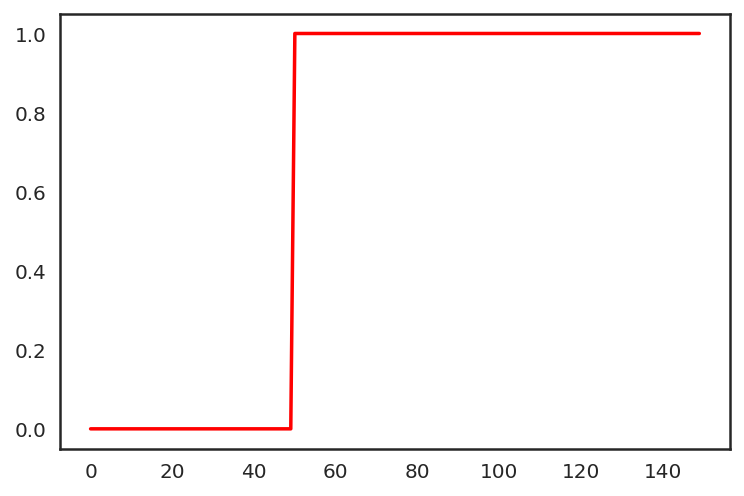

In [37]:
model = LogisticRegression(C=1)
model.fit(X, y)
plt.plot(model.predict(X))

## 10折交叉验证与网格搜索 

In [38]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = LogisticRegression()
clf = GridSearchCV(model, parameters, cv=10)
clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


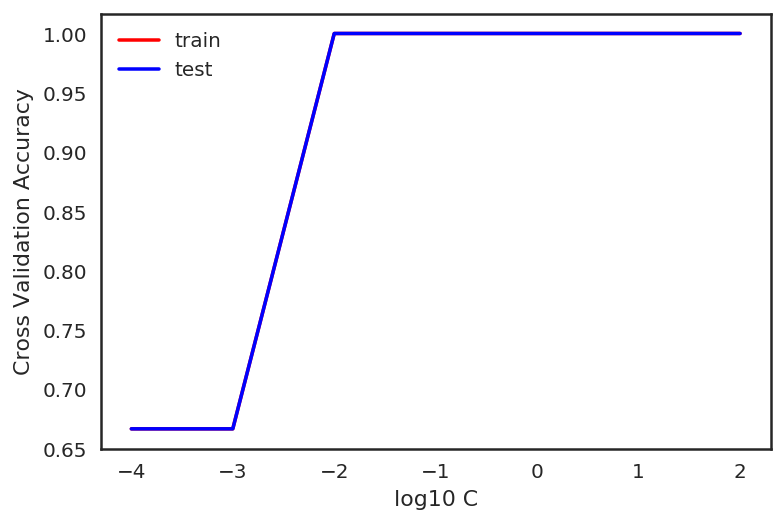

In [39]:
plt.plot( np.log10(np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100])), clf.cv_results_['mean_train_score'], label="train")
plt.plot( np.log10(np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100])), clf.cv_results_['mean_test_score'], label="test")
plt.xlabel("log10 C")
plt.legend()
plt.ylabel("Cross Validation Accuracy")

## AUC值用于评价数据分布不均情况下的模型质量

In [40]:
from sklearn.metrics import roc_curve,auc
np.random.seed(42)
# 假如真实情况1万个病人，有10个是有病的
np_real = np.array([0.0  for i in range(9990)] + [1.0 for i in range(10) ], dtype=bool)

# 预测1， 全预测为没问题，准确率 99.90%
np_pred_allf = 0.1*np.random.random(10000)

# 预测2:，准确预测使用情况，准确率 100%
np_pred_true = np_pred_allf.copy()
np_pred_true[-10:] = 0.99

fpr, tpr, thresholds    = roc_curve(np.array(np_real, dtype=int),np_pred_allf )
AUC_value = auc(fpr, tpr)

fpr2, tpr2, thresholds2 = roc_curve(np.array(np_real, dtype=int),np_pred_true )
AUC_value2 = auc(fpr2, tpr2)

# 虽然准确率差不多，但是AUC值差异巨大
print(AUC_value, AUC_value2)

0.555805805806 1.0


/root/miniconda3/envs/tencentGPU/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


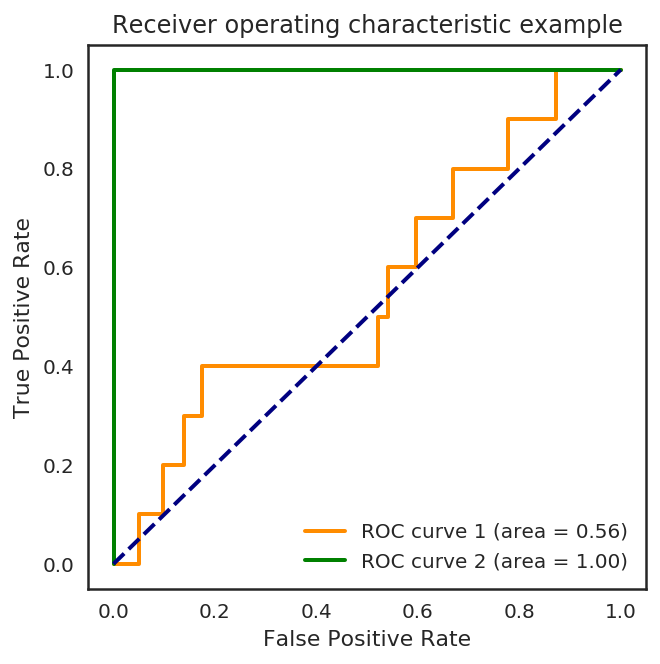

In [41]:
fpr2 = np.array([0] + list(fpr2))
tpr2 = np.array([0] + list(tpr2))

plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve 1 (area = %0.2f)' % AUC_value)
plt.plot(fpr2, tpr2, color='g',
         lw=lw, label='ROC curve 2 (area = %0.2f)' % AUC_value2)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()